<a href="https://colab.research.google.com/github/SidharthaAnisetti/Lets-Upgrade-AI-ML/blob/master/Linear_Classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
len(data.feature_names)

30

In [11]:
data.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [13]:
#pora jaffa

sidharth notebook

In [14]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)


In [16]:
X_train.shape

(381, 30)

In [17]:
X_test.shape

(188, 30)

In [18]:
N, D = X_train.shape

# N = No of rows
# D = No of cols/features

print(N,D)

381 30


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
X_train[0]

array([-0.28512367,  0.39168427, -0.25295592, -0.3425752 , -0.70646691,
        0.07090191,  0.23583392, -0.36465258, -0.9213164 , -0.36721686,
       -0.34459394, -0.80292146, -0.28595293, -0.30580365,  0.02544747,
        0.34410317,  0.42720723,  0.10884779, -0.60935089, -0.21103277,
       -0.31065653,  0.00486161, -0.19733094, -0.34549958,  0.10174842,
        0.66982393,  0.85925392,  0.05821438, -0.56184814, -0.1017539 ])

In [21]:
X_test[0]

array([-0.78462989, -1.18204581, -0.82187234, -0.73100959, -0.21374783,
       -1.23871634, -1.08715332, -1.17737009,  0.51357606, -0.64257502,
       -0.62808184,  0.13466072, -0.6600135 , -0.5427495 ,  0.37540586,
       -0.89976786, -0.93267967, -1.35696444,  0.29170122, -0.775641  ,
       -0.84202252, -1.0445428 , -0.88736116, -0.74919626, -0.3093454 ,
       -1.15114844, -1.24834593, -1.56648629, -0.23569403, -1.14921152])

TensorFlow

First I will building a MODEL, of type SEQUENTIAL.

SEQUENTIAL consists of 2 objects:

Input: Placeholder. Used to specify the size of the input features i.e. D in our case

Dense: Real work i.e. Model learning happens here.

This is a classification problem. Therefore the Activation function used at the Output layer is: Sigmoid

In [22]:
# Build a model

# There are 2 ways:

# WAY1:

# model = tf.keras.models.Sequential([
#                             tf.keras.layers.Input(shape=(D,)),
#                             tf.keras.layers.Dense(1,activation='sigmoid')
# ])

# WAY2:

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
#r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

r = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 1.2579 - accuracy: 0.1680 - val_loss: 1.1995 - val_accuracy: 0.2021
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1478 - accuracy: 0.1995 - val_loss: 1.0966 - val_accuracy: 0.2394
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0474 - accuracy: 0.2546 - val_loss: 1.0013 - val_accuracy: 0.2926
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9528 - accuracy: 0.3071 - val_loss: 0.9165 - val_accuracy: 0.3564
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8701 - accuracy: 0.4121 - val_loss: 0.8400 - val_accuracy: 0.4415
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7966 - accuracy: 0.4777 - val_loss: 0.7717 - val_accuracy: 0.4894
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.5669 - val_loss: 0.7122 - val_accuracy: 0.5745
Epoch 8/100


In [26]:
# Evaluate

print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9764
[0.1068035140633583, 0.9763779640197754]
6/6 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9628
[0.12852723896503448, 0.9627659320831299]


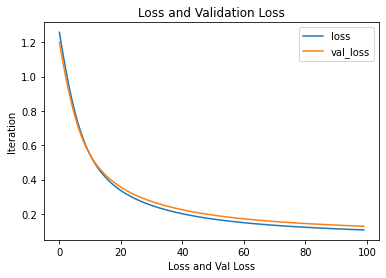

In [27]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss", loc='center')
plt.xlabel("Loss and Val Loss")
plt.ylabel("Iteration")
plt.legend();

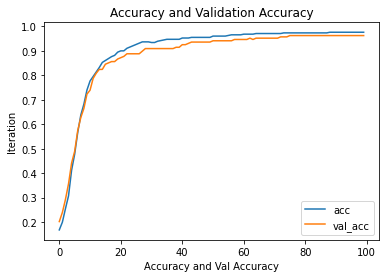

In [28]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.title("Accuracy and Validation Accuracy", loc='center')
plt.xlabel("Accuracy and Val Accuracy")
plt.ylabel("Iteration")
plt.legend();

In [29]:
y_pred = model.predict(X_test)
print(y_pred)

[[9.97122169e-01]
 [8.99037242e-01]
 [9.70298767e-01]
 [6.41679645e-01]
 [2.34419435e-01]
 [3.17857563e-02]
 [9.98814344e-01]
 [2.95184163e-05]
 [9.95589852e-01]
 [3.77871096e-01]
 [9.90036011e-01]
 [3.87349725e-03]
 [2.65429616e-02]
 [7.66754150e-04]
 [9.73061800e-01]
 [4.08557057e-03]
 [7.99183846e-02]
 [9.24327314e-01]
 [9.38297629e-01]
 [6.23753190e-01]
 [5.89726269e-01]
 [9.18788016e-01]
 [9.89028573e-01]
 [9.96425748e-01]
 [9.12013233e-01]
 [9.96451974e-01]
 [8.95553350e-01]
 [9.79329467e-01]
 [9.78287697e-01]
 [9.99058962e-01]
 [2.40234137e-02]
 [9.32807267e-01]
 [9.78542686e-01]
 [9.21413898e-01]
 [7.73823500e-01]
 [9.83881235e-01]
 [9.97584879e-01]
 [9.66908693e-01]
 [7.69426584e-01]
 [9.90066946e-01]
 [9.86530066e-01]
 [8.02392364e-01]
 [9.57506895e-03]
 [7.67208636e-02]
 [5.11903644e-01]
 [9.82330859e-01]
 [9.67773378e-01]
 [9.92113352e-01]
 [9.63417649e-01]
 [8.81898999e-02]
 [9.78836060e-01]
 [4.76162970e-01]
 [6.24328673e-01]
 [7.22131908e-01]
 [9.87760603e-01]
 [3.360947

In [31]:
import numpy as np
y_pred=np.round(y_pred).flatten()
y_pred

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0.], dtype=float32)

In [32]:
np.mean(y_pred==y_test)

0.9627659574468085

In [33]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9628


[0.12852723896503448, 0.9627659320831299]